Data Science Intern @LGM Virtual Internship 2023

NAME - RUTUJA ANIL KADAM

TASK 3 (BEGINNER  LEVEL TASK) Image to Pencil Sketch with Python:

We need to read the image in RBG format and then convert it to a grayscale image. This will turn an image into a classic black and white photo. Then the next thing to do is invert the grayscale image also called negative image, this will be our inverted grayscale image. Inversion can be used to enhance details. Then we can finally create the pencil sketch by mixing the grayscale image with the inverted blurry image. This can be done by dividing the grayscale image by the inverted blurry image. Since images are just arrays, we can easily do this programmatically using the divide function from the cv2 library in Python

#Importing Packages

In [1]:
import cv2
import numpy as np
import plotly.express as px

Loading Images

In [2]:
img = cv2.imread("dog.webp")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
imgs=px.imshow(img)


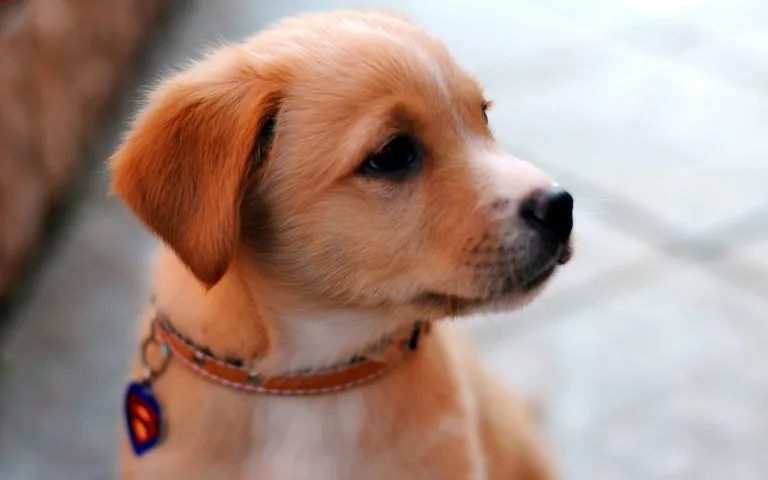

In [3]:
imgs.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
imgs.show()

Resizing image shape


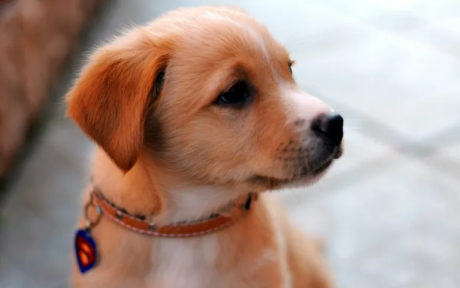

In [4]:
scale_percent = 0.60
width = int(img.shape[1]*scale_percent)
height = int(img.shape[0]*scale_percent)
dim = (width,height)
resized = cv2.resize(img,dim,interpolation = cv2.INTER_AREA)
res=px.imshow(resized)
res.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
res.show()

Sharpening Image


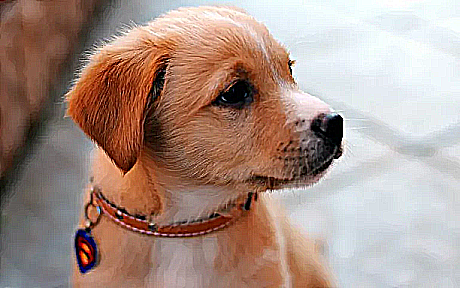

In [5]:
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])
sharpened = cv2.filter2D(resized,-1,kernel_sharpening)
sharp=px.imshow(sharpened)
sharp.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
sharp.show()

Converting an image into gray_scale image

In [6]:
grayscale = cv2.cvtColor(sharpened , cv2.COLOR_BGR2GRAY)
gray = px.imshow(grayscale, color_continuous_scale='gray')
gray.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
gray.show()

Inverting the image

In [7]:
invs = 255-grayscale
inv=px.imshow(invs,color_continuous_scale='gray')
inv.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
inv.show()


Smoothing the image

In [8]:
gauss = cv2.GaussianBlur(invs,ksize=(15,15),sigmaX=0,sigmaY=0)
gaus=px.imshow(gauss,color_continuous_scale='gray')
gaus.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
gaus.show()

Obtaining the final sketch

In [9]:
def dodgeV2(image,mask):
    return cv2.divide(image,255-mask,scale=256)

pencil_img = dodgeV2(grayscale,gauss)
sketch=px.imshow(pencil_img,color_continuous_scale='gray')
#sketch.update_layout(width=990, height=600 ,margin=dict(l=20, r=20, b=10, t=10))
sketch.update_layout(coloraxis_showscale=False)
sketch.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
sketch.show()
